22:48:48 - cmdstanpy - INFO - Chain [1] start processing
22:48:48 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\hayda\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


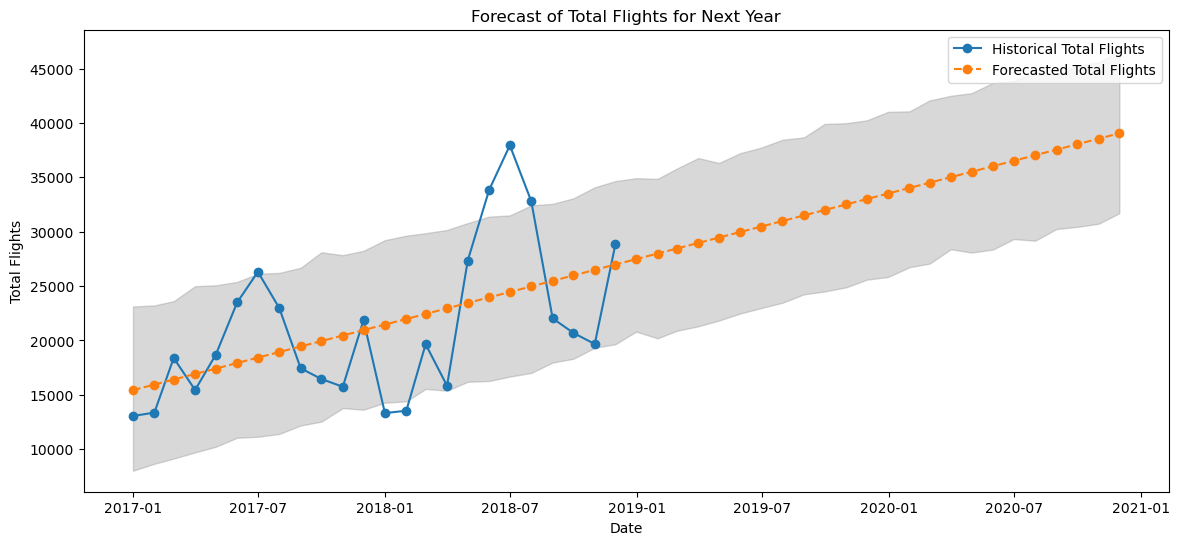

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

Flight = pd.read_csv('Customer Flight Activity.csv')

monthly_trends = Flight.groupby(['Year', 'Month']).sum().reset_index()

monthly_trends['ds'] = pd.to_datetime(monthly_trends['Year'].astype(str) + '-' + monthly_trends['Month'].astype(str) + '-01')
monthly_trends['y'] = monthly_trends['Total Flights']

model = Prophet()
model.fit(monthly_trends[['ds', 'y']])

future = model.make_future_dataframe(periods=24, freq='M')
forecast = model.predict(future)

# Plot forecasted values along with historical data
plt.figure(figsize=(14, 6))
plt.plot(monthly_trends['ds'], monthly_trends['y'], label='Historical Total Flights', marker='o')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecasted Total Flights', linestyle='--', marker='o')

plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.3)  # Confidence interval
plt.title('Forecast of Total Flights for Next Year')
plt.xlabel('Date')
plt.ylabel('Total Flights')
plt.legend()
plt.show()

# Similarly, you can forecast and plot for 'Distance' or 'Points Accumulated'


C:\Users\hayda\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\hayda\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\hayda\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\hayda\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


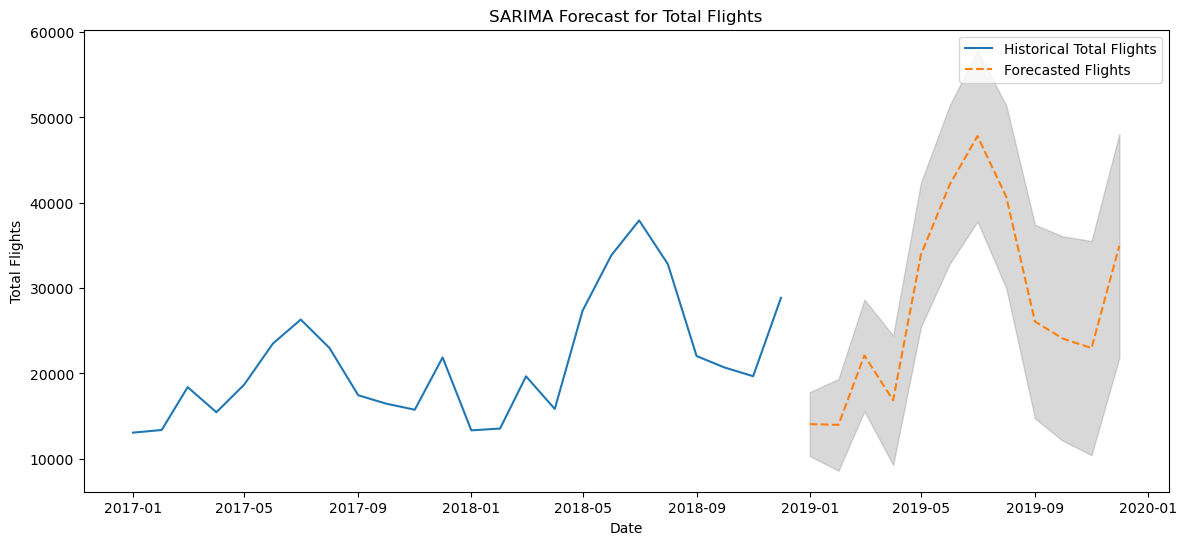

KeyError: '2019'

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error
# Load your flight data
Flight = pd.read_csv('Customer Flight Activity.csv')

# Aggregate data by month and year
monthly_trends = Flight.groupby(['Year', 'Month']).sum().reset_index()

# Create a 'date' column
monthly_trends['ds'] = pd.to_datetime(monthly_trends['Year'].astype(str) + '-' + monthly_trends['Month'].astype(str) + '-01')

# Set the date as the index for SARIMA
monthly_trends.set_index('ds', inplace=True)

# Use only the 'Total Flights' column
y = monthly_trends['Total Flights']

# Define the SARIMA model
model = SARIMAX(y, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

# Fit the model
sarima_model = model.fit(disp=False)

# Forecast for the next 12 months
forecast = sarima_model.get_forecast(steps=12)
forecast_df = forecast.conf_int()
forecast_df['Forecasted Flights'] = sarima_model.predict(start=forecast_df.index[0], end=forecast_df.index[-1])

# Plot historical data and the forecast
plt.figure(figsize=(14, 6))
plt.plot(y.index, y, label='Historical Total Flights')
plt.plot(forecast_df.index, forecast_df['Forecasted Flights'], label='Forecasted Flights', linestyle='--')

# Show confidence intervals
plt.fill_between(forecast_df.index, forecast_df.iloc[:, 0], forecast_df.iloc[:, 1], color='gray', alpha=0.3)

plt.title('SARIMA Forecast for Total Flights')
plt.xlabel('Date')
plt.ylabel('Total Flights')
plt.legend()
plt.show()

# Example of model evaluation with MAE
train = y[:'2018']  # Train on data up to 2018
test = y['2019']  # Test on 2019 data

# Fit SARIMA on training data
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_model = model.fit(disp=False)

# Make predictions for the test set
predictions = sarima_model.get_forecast(steps=len(test))
forecast_values = predictions.predicted_mean

# Calculate MAE
mae = mean_absolute_error(test, forecast_values)
print(f'Mean Absolute Error: {mae}')
